# Predicting English Premier League Results using Machine Learning

## 1. Problem Definition
> Predict the result of English soccer match. The possible results are: home team win, draw, and away team win.

## 2. Data
Data is English Premier League matches from 2007 to 2022. The data is collected from https://footystats.org/england/premier-league# 

## 3. Evaluation
> We are looking to get a prediction accuracy of over 50%

## 4. Feature
There are 64 different attributes. There are 18 attributes consists of betting odd from betting sites, we will set them aside for the scope of this project. For future analysis, we may consider these attributes in our model.

There are 3 attributes which are confused. We do not know which team these stats belong to. We may need to consult a subject matter expert:
1. average_goals_per_match_pre_match
2. average_corners_per_match_pre_match
3. average_cards_per_match_pre_match

There are 30 attributes which are statistics recorded after the game:
1. attendance
2. home_team_goal_count
3. away_team_goal_count
4. total_goals_at_half_time
5. home_team_goal_count_half_time
6. away_team_goal_count_half_time
7. home_team_goal_timings
8. away_team_goal_timings
9. home_team_corner_count
10. away_team_corner_count
11. home_team_yellow_cards
12. home_team_red_cards
13. away_team_yellow_cards
14. away_team_red_cards
15. home_team_first_half_cards
16. home_team_second_half_cards
17. away_team_first_half_cards
18. away_team_second_half_cards
19. home_team_shots
20. away_team_shots 
21. home_team_shots_on_target
22. away_team_shots_on_target
23. home_team_shots_off_target
24. away_team_shots_off_target
25. home_team_fouls
26. away_team_fouls
27. home_team_possession
28. away_team_possession
29. team_a_xg: Expected goal of home team
30. team_b_xg: Expected goal of away team

There are 12 attributes we know ahead of the game:
1. timestamp
2. date_GMT: date and time the match starts
3. status: whether the match completed. All the values are completed (because all matched have been concluded)
4. home_team_name
5. away_team_name
6. referee: official of the match
7. Game Week: A value from 1 to 38 indicating the round of the League
8. Pre-Match PPG (Home): point per game of home team when played at home
9. Pre-Match PPG (Away): point per game of away team when played at home
10. home_ppg: point per game of home team 
11. away_ppg: point per game of away team
12. stadium_name: The venue in which the match takes place. Usually associated with the home team. Sometimes teams relocate to a new stadium or forced to played in a neutral court (very unlikely)


In [118]:
# Import library
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [119]:
# Function to load csv file into dataframe
def preprocess(path):
  csv_path = os.path.join(path)
  df = pd.read_csv(csv_path)  
  return df

In [256]:
# Load the cvs file from 2007/2008 to 2021/2022
df2007 = preprocess('drive/MyDrive/EPL/england-premier-league-matches-2007-to-2008-stats.csv')
df2008 = preprocess('drive/MyDrive/EPL/england-premier-league-matches-2008-to-2009-stats.csv')
df2009 = preprocess('drive/MyDrive/EPL/england-premier-league-matches-2009-to-2010-stats.csv')
df2010 = preprocess('drive/MyDrive/EPL/england-premier-league-matches-2010-to-2011-stats.csv')
df2011 = preprocess('drive/MyDrive/EPL/england-premier-league-matches-2011-to-2012-stats.csv')
df2012 = preprocess('drive/MyDrive/EPL/england-premier-league-matches-2012-to-2013-stats.csv')
df2013 = preprocess('drive/MyDrive/EPL/england-premier-league-matches-2013-to-2014-stats.csv')
df2014 = preprocess('drive/MyDrive/EPL/england-premier-league-matches-2014-to-2015-stats.csv')
df2015 = preprocess('drive/MyDrive/EPL/england-premier-league-matches-2015-to-2016-stats.csv')
df2016 = preprocess('drive/MyDrive/EPL/england-premier-league-matches-2016-to-2017-stats.csv')
df2017 = preprocess('drive/MyDrive/EPL/england-premier-league-matches-2017-to-2018-stats.csv')
df2018 = preprocess('drive/MyDrive/EPL/england-premier-league-matches-2018-to-2019-stats.csv')
df2019 = preprocess('drive/MyDrive/EPL/england-premier-league-matches-2019-to-2020-stats.csv')
df2020 = preprocess('drive/MyDrive/EPL/england-premier-league-matches-2020-to-2021-stats.csv')
df2021 = preprocess('drive/MyDrive/EPL/england-premier-league-matches-2021-to-2022-stats.csv')

In [180]:
# Merge all dataframe
epl = pd.concat([df2007, df2008, df2009, df2010, df2011, df2012, df2013, df2014, df2015, df2016, df2017, df2018, df2019, df2020, df2021])

In [181]:
# List the columns of dataframe
epl.columns

Index(['timestamp', 'date_GMT', 'status', 'attendance', 'home_team_name',
       'away_team_name', 'referee', 'Game Week', 'Pre-Match PPG (Home)',
       'Pre-Match PPG (Away)', 'home_ppg', 'away_ppg', 'home_team_goal_count',
       'away_team_goal_count', 'total_goal_count', 'total_goals_at_half_time',
       'home_team_goal_count_half_time', 'away_team_goal_count_half_time',
       'home_team_goal_timings', 'away_team_goal_timings',
       'home_team_corner_count', 'away_team_corner_count',
       'home_team_yellow_cards', 'home_team_red_cards',
       'away_team_yellow_cards', 'away_team_red_cards',
       'home_team_first_half_cards', 'home_team_second_half_cards',
       'away_team_first_half_cards', 'away_team_second_half_cards',
       'home_team_shots', 'away_team_shots', 'home_team_shots_on_target',
       'away_team_shots_on_target', 'home_team_shots_off_target',
       'away_team_shots_off_target', 'home_team_fouls', 'away_team_fouls',
       'home_team_possession', 'away_te

In [182]:
epl.head()

,timestamp,date_GMT,status,attendance,home_team_name,away_team_name,referee,Game Week,Pre-Match PPG (Home),Pre-Match PPG (Away),...,odds_ft_home_team_win,odds_ft_draw,odds_ft_away_team_win,odds_ft_over15,odds_ft_over25,odds_ft_over35,odds_ft_over45,odds_btts_yes,odds_btts_no,stadium_name
0,1186832700,Aug 11 2007 - 11:45am,complete,NaN,Sunderland,Tottenham Hotspur,NaN,NaN,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Stadium of Light (Sunderland)
1,1186840800,Aug 11 2007 - 2:00pm,complete,NaN,West Ham United,Manchester City,NaN,NaN,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Boleyn Ground (London)
2,1186840800,Aug 11 2007 - 2:00pm,complete,NaN,Middlesbrough,Blackburn Rovers,NaN,NaN,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Riverside Stadium (Middlesbrough)
3,1186840800,Aug 11 2007 - 2:00pm,complete,NaN,Everton,Wigan Athletic,NaN,NaN,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Goodison Park (Liverpool)
4,1186840800,Aug 11 2007 - 2:00pm,complete,NaN,Derby County,Portsmouth,NaN,NaN,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Pride Park Stadium (Derby)


## Prepare the data

Many of the columns are betting odds. Although they have implication on the prediction, we will drop them out for the scope of this project.
Some of the columns are statistics collected throughout the matches, we will leave them out because we want to predict the result before the matches start.


In [197]:
epl_prematch = epl.drop(columns=['total_goal_count', 'total_goal_count', 'total_goals_at_half_time',
       'home_team_goal_count_half_time', 'away_team_goal_count_half_time','home_team_goal_timings', 'away_team_goal_timings',
       'home_team_corner_count', 'away_team_corner_count',
       'home_team_yellow_cards', 'home_team_red_cards',
       'away_team_yellow_cards', 'away_team_red_cards',
       'home_team_first_half_cards', 'home_team_second_half_cards',
       'away_team_first_half_cards', 'away_team_second_half_cards',
       'home_team_shots', 'away_team_shots', 'home_team_shots_on_target',
       'away_team_shots_on_target', 'home_team_shots_off_target',
       'away_team_shots_off_target', 'home_team_fouls', 'away_team_fouls',
       'home_team_possession', 'away_team_possession', 'team_a_xg',
       'team_b_xg', 'average_goals_per_match_pre_match',
       'btts_percentage_pre_match', 'over_15_percentage_pre_match',
       'over_25_percentage_pre_match', 'over_35_percentage_pre_match',
       'over_45_percentage_pre_match', 'over_15_HT_FHG_percentage_pre_match',
       'over_05_HT_FHG_percentage_pre_match',
       'over_15_2HG_percentage_pre_match', 'over_05_2HG_percentage_pre_match',
       'average_corners_per_match_pre_match',
       'average_cards_per_match_pre_match', 'odds_ft_home_team_win',
       'odds_ft_draw', 'odds_ft_away_team_win', 'odds_ft_over15',
       'odds_ft_over25', 'odds_ft_over35', 'odds_ft_over45', 'odds_btts_yes',
       'odds_btts_no'])

In [198]:
epl_prematch.columns

Index(['timestamp', 'date_GMT', 'status', 'attendance', 'home_team_name',
       'away_team_name', 'referee', 'Game Week', 'Pre-Match PPG (Home)',
       'Pre-Match PPG (Away)', 'home_ppg', 'away_ppg', 'home_team_goal_count',
       'away_team_goal_count', 'stadium_name'],
      dtype='object')

In [199]:
# Let's take a peek at the first 5 rows of our dataframe
epl_prematch.head()

,timestamp,date_GMT,status,attendance,home_team_name,away_team_name,referee,Game Week,Pre-Match PPG (Home),Pre-Match PPG (Away),home_ppg,away_ppg,home_team_goal_count,away_team_goal_count,stadium_name
0,1186832700,Aug 11 2007 - 11:45am,complete,NaN,Sunderland,Tottenham Hotspur,NaN,NaN,0.0,0.0,1.58,0.89,1,0,Stadium of Light (Sunderland)
1,1186840800,Aug 11 2007 - 2:00pm,complete,NaN,West Ham United,Manchester City,NaN,NaN,0.0,0.0,1.47,0.95,0,2,Boleyn Ground (London)
2,1186840800,Aug 11 2007 - 2:00pm,complete,NaN,Middlesbrough,Blackburn Rovers,NaN,NaN,0.0,0.0,1.37,1.42,1,2,Riverside Stadium (Middlesbrough)
3,1186840800,Aug 11 2007 - 2:00pm,complete,NaN,Everton,Wigan Athletic,NaN,NaN,0.0,0.0,1.95,0.58,2,1,Goodison Park (Liverpool)
4,1186840800,Aug 11 2007 - 2:00pm,complete,NaN,Derby County,Portsmouth,NaN,NaN,0.0,0.0,0.42,1.47,2,2,Pride Park Stadium (Derby)


In [200]:
# There are 3 columns with missing values. Let's take a look at them
epl_prematch.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5700 entries, 0 to 379
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   timestamp             5700 non-null   int64  
 1   date_GMT              5700 non-null   object 
 2   status                5700 non-null   object 
 3   attendance            4493 non-null   float64
 4   home_team_name        5700 non-null   object 
 5   away_team_name        5700 non-null   object 
 6   referee               2996 non-null   object 
 7   Game Week             4940 non-null   float64
 8   Pre-Match PPG (Home)  5700 non-null   float64
 9   Pre-Match PPG (Away)  5700 non-null   float64
 10  home_ppg              5700 non-null   float64
 11  away_ppg              5700 non-null   float64
 12  home_team_goal_count  5700 non-null   int64  
 13  away_team_goal_count  5700 non-null   int64  
 14  stadium_name          5700 non-null   object 
dtypes: float64(6), int64(3

The referee column has about 50% missing values. We will assume that referees are unbiased and treat each team equally, so we will drop this column.
Each season has 38 game weeks, so values of Game Week column are integer from 1 to 38. It is complex to impute this column because although most of them are in order, some matches are postponed till much later into the season. All of the missing values are in the first 2 dataframe epl2007 and epl2008 (760 rows total). We elect to choose to remove this column from our model 

In [201]:
epl_prematch = epl_prematch.drop(columns=["referee", "Game Week"])

In [202]:
# Encode the home team, away team, and stadium name to ordinal values
epl_prematch["home_team_code"] = epl_prematch["home_team_name"].astype("category").cat.codes
epl_prematch["away_team_code"] = epl_prematch["away_team_name"].astype("category").cat.codes
epl_prematch["stadium_name"] = epl_prematch["stadium_name"].astype("category").cat.codes

Split the date_GMT columns into year, month, day of week, and hour. We want to check whether a team performs better in certain month or day or hour.
Convert the date_GMT to datetime to split the data into train and test data

In [203]:
epl_prematch["year"] = pd.to_datetime(epl_prematch["date_GMT"].str[:11]).dt.year
epl_prematch["month"] = pd.to_datetime(epl_prematch["date_GMT"].str[:11]).dt.month
epl_prematch["day"] = pd.to_datetime(epl_prematch["date_GMT"].str[:11]).dt.dayofweek
epl_prematch["hour"] = epl_prematch["date_GMT"].str[14:].str.replace(":.+", "", regex=True).astype("int")
epl_prematch["date_GMT"] = pd.to_datetime(epl_prematch["date_GMT"])

In [204]:
# Create the predictor variables
predictors = ["year", "month","day", "hour", "attendance", "home_team_code", "away_team_code", 'Pre-Match PPG (Home)', 'Pre-Match PPG (Away)','home_ppg', 'away_ppg','stadium_name']

In [205]:
# Create the target variables. 0 is draw, 1 is home team wins, 2 is away team wins
epl_prematch.loc[epl_prematch["home_team_goal_count"] == epl_prematch["away_team_goal_count"], "result"] = 0
epl_prematch.loc[epl_prematch["home_team_goal_count"] > epl_prematch["away_team_goal_count"], "result"] = 1
epl_prematch.loc[epl_prematch["home_team_goal_count"] < epl_prematch["away_team_goal_count"], "result"] = 2

In [206]:
# Split the data
train_data = epl_prematch[epl_prematch["date_GMT"] < "2021-08-01"] # Matches played before the 2021/2022 season
test_data = epl_prematch[epl_prematch["date_GMT"] > "2021-08-01"] # Matches played from 2021/2022 season onward

In [194]:
# Impute the missing values from the attendance column by the mean of attendance from each stadium
train_data["attendance"] = train_data["attendance"].fillna(train_data.groupby("stadium_name")["attendance"].transform("median"))
test_data["attendance"] = test_data["attendance"].fillna(test_data.groupby("stadium_name")["attendance"].transform("median"))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


There are still missing values in the attendance column. In the English Premier League, the bottom 3 teams will be relegated at the end of the season. The reason for missing values could be due to teams got relegated before the attendance was collected and they have not get promoted since the attendance was collected. 

In [211]:
# Impute the other missing attendance using the League average
train_data["attendance"] = train_data["attendance"].fillna(train_data["attendance"].median())
test_data["attendance"] = test_data["attendance"].fillna(test_data["attendance"].median())

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


Since timestamp and GMT date are similar, we drop timestamp. All status values are complete, we drop the status column

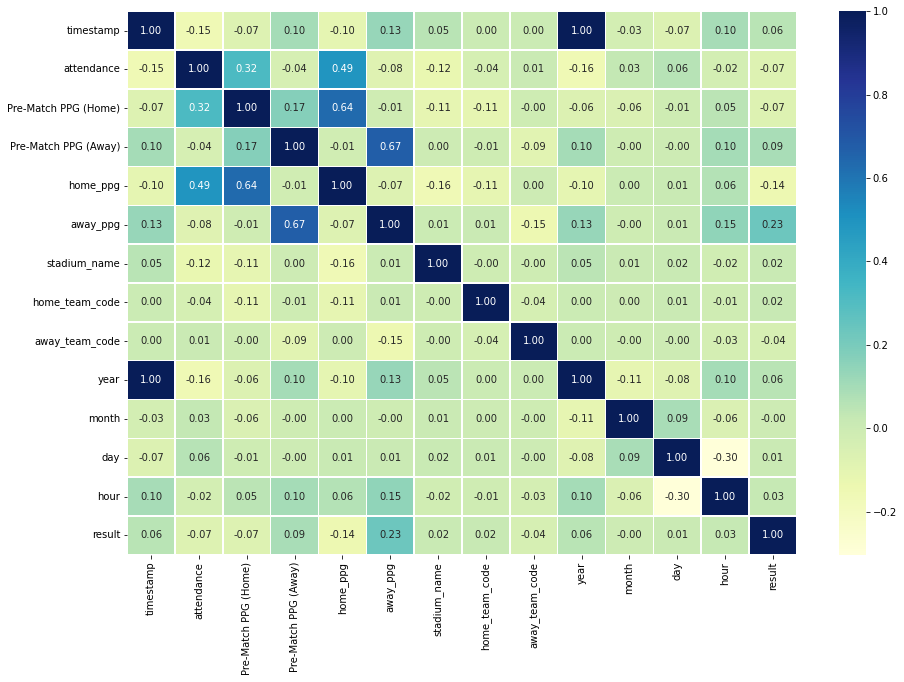

In [213]:
# Let's look at correlation matrix 
corr_matrix = train_data.drop(columns=["home_team_goal_count", "away_team_goal_count"]).corr()
fig, ax = plt.subplots(figsize=(15, 10))
ax = sns.heatmap(corr_matrix,
                annot=True,
                linewidth=0.5,
                fmt=".2f",
                cmap="YlGnBu")

Since we use data from the past to predict results in the future. Our training data will consists of match played before test data

## 5. Train machine learning models

To create a baseline, we simply predict all the home teams would win due to home court advantage. We use accuracy score as our metric because we want to measure the accuracy of our classification model

### Naive Prediction


In [214]:
# Create a baseline
from sklearn.metrics import accuracy_score
preds = np.ones(len(test_data))
acc_base = accuracy_score(test_data["result"], preds)
acc_base

0.42894736842105263

### Machine Learning Model
This is a classification problem involving 3 classes, hence we cannot use Logistic Regression and SVM. We will use Decision Tree and Random Forest.


### Decision Tree Model

In [215]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state = 1)
dt.fit(train_data[predictors], train_data["result"])

DecisionTreeClassifier(random_state=1)

In [216]:
preds = dt.predict(test_data[predictors])
acc_dt = accuracy_score(test_data["result"], preds)
acc_dt

0.4631578947368421

### Random Forest Model
We barely beat the baseline with the Decision Tree. Let's try a Random Forest

In [217]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators = 100, min_samples_split=20, random_state=1)
rf.fit(train_data[predictors], train_data["result"])

RandomForestClassifier(min_samples_split=20, random_state=1)

In [218]:
preds = rf.predict(test_data[predictors])
from sklearn.metrics import accuracy_score
acc_rf = accuracy_score(test_data["result"], preds)

In [219]:
acc_rf

0.5815789473684211

We reach 58.16% accuracy, a much better result compared to our decision tree classifier.

### Add rolling averages from stats collected from previous matches to improve our model

Earlier we left match statistics out. Now we will include the rolling average of those statistics before the match to see if they can improve out model. From 2007/2008 to 2011/2012, a lot of statistic columns only consist of 0 and -1. We will only use data from 2012/2013 onward to train our model.

In [239]:
epl_reduce = pd.concat([df2012, df2013, df2014, df2015, df2016, df2017, df2018, df2019, df2020])

In [240]:
# Function to prepare the dataframe
def prepare(df):
  df["attendance"] = df["attendance"].fillna(df.groupby("stadium_name")["attendance"].transform("median"))
  df["attendance"] = df["attendance"].fillna(df["attendance"].median())
  df["home_team_code"] = df["home_team_name"].astype("category").cat.codes
  df["away_team_code"] = df["away_team_name"].astype("category").cat.codes
  df["stadium_name"] = df["stadium_name"].astype("category").cat.codes
  df["year"] = pd.to_datetime(df["date_GMT"].str[:11]).dt.year
  df["month"] = pd.to_datetime(df["date_GMT"].str[:11]).dt.month
  df["day"] = pd.to_datetime(df["date_GMT"].str[:11]).dt.dayofweek
  df["hour"] = df["date_GMT"].str[14:].str.replace(":.+", "", regex=True).astype("int")
  df["date_GMT"] = pd.to_datetime(df["date_GMT"])
  df.loc[df["home_team_goal_count"] == df["away_team_goal_count"], "result"] = 0
  df.loc[df["home_team_goal_count"] > df["away_team_goal_count"], "result"] = 1
  df.loc[df["home_team_goal_count"] < df["away_team_goal_count"], "result"] = 2

In [241]:
prepare(epl_reduce)
epl_reduce.head()

,timestamp,date_GMT,status,attendance,home_team_name,away_team_name,referee,Game Week,Pre-Match PPG (Home),Pre-Match PPG (Away),...,odds_btts_yes,odds_btts_no,stadium_name,home_team_code,away_team_code,year,month,day,hour,result
0,1345298400,2012-08-18 14:00:00,complete,60078.0,Arsenal,Sunderland,NaN,1,0.0,0.0,...,0.0,0.0,12,1,25,2012,8,5,2,0.0
1,1345298400,2012-08-18 14:00:00,complete,25062.0,Fulham,Norwich City,NaN,1,0.0,0.0,...,0.0,0.0,9,9,19,2012,8,5,2,1.0
2,1345298400,2012-08-18 14:00:00,complete,18072.0,Queens Park Rangers,Swansea City,NaN,1,0.0,0.0,...,0.0,0.0,26,20,26,2012,8,5,2,2.0
3,1345298400,2012-08-18 14:00:00,complete,23973.0,Reading,Stoke City,NaN,1,0.0,0.0,...,0.0,0.0,29,21,24,2012,8,5,2,0.0
4,1345298400,2012-08-18 14:00:00,complete,26039.0,West Bromwich Albion,Liverpool,NaN,1,0.0,0.0,...,0.0,0.0,47,29,14,2012,8,5,2,1.0


In [242]:
# Function to calculate the rolling averages
def rolling_averages(group, cols, new_cols):
  group = group.sort_values("date_GMT")
  rolling_stats = group[cols].rolling(5, closed="left").mean()
  group[new_cols] = rolling_stats
  group = group.dropna(subset=new_cols)
  return group 

In [224]:
cols = ["home_team_goal_count", 'home_team_shots', 'home_team_shots_on_target',
       'home_team_possession']
new_cols_home = [f"{c}_rolling" for c in cols]

In [232]:
# Rolling averages of last 5 games when the home team played at their stadium
epl_rolling = epl_reduce.groupby("home_team_name").apply(lambda x: rolling_averages(x, cols, new_cols_home))
epl_rolling = epl_rolling.droplevel("home_team_name")

In [233]:
cols = ["away_team_goal_count", 'away_team_shots', 'away_team_shots_on_target',
       'away_team_possession']
new_cols_away = [f"{c}_rolling" for c in cols]

In [234]:
# Rolling averages of last 5 games when the away team played at their opponent's stadium
epl_rolling = epl_rolling.groupby("away_team_name").apply(lambda x:rolling_averages(x, cols, new_cols_away))

In [235]:
epl_rolling = epl_rolling.droplevel("away_team_name")

In [244]:
# Function to add rolling average features to dataframe
def add_rolling_features(df):
  # Columns to calculate rolling average for home team
  cols = ["home_team_goal_count", 'home_team_shots', 'home_team_shots_on_target',
       'home_team_possession']
  new_cols_home = [f"{c}_rolling" for c in cols]
  # Rolling averages of last 5 games when the home team played at their stadium
  epl_rolling = df.groupby("home_team_name").apply(lambda x: rolling_averages(x, cols, new_cols_home))
  epl_rolling = epl_rolling.droplevel("home_team_name")
  # Columns to calculate rolling average for away team
  cols = ["away_team_goal_count", 'away_team_shots', 'away_team_shots_on_target',
       'away_team_possession']
  new_cols_away = [f"{c}_rolling" for c in cols]
  # Rolling averages of last 5 games when the away team played at their opponent's stadium
  epl_rolling = epl_rolling.groupby("away_team_name").apply(lambda x:rolling_averages(x, cols, new_cols_away))
  epl_rolling = epl_rolling.droplevel("away_team_name")  
  return epl_rolling, new_cols_home, new_cols_away

In [245]:
epl_rolling, new_cols_home, new_cols_away = add_rolling_features(epl_reduce)

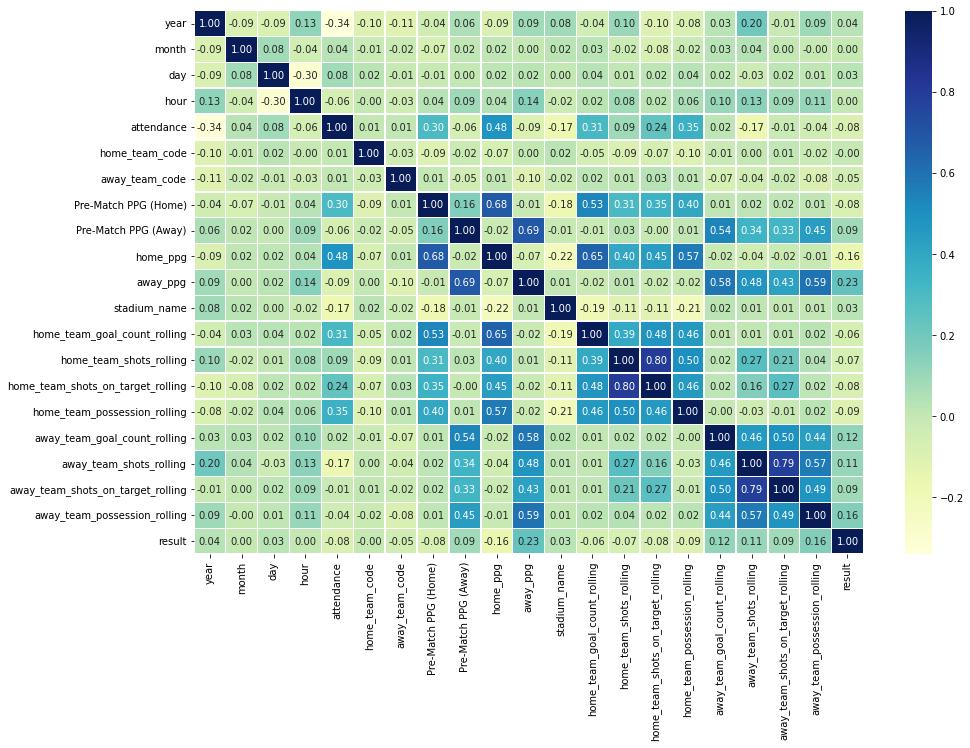

In [246]:
corr_matrix = epl_rolling[predictors+new_cols_home+new_cols_away+["result"]].corr()
fig, ax = plt.subplots(figsize=(15, 10))
ax = sns.heatmap(corr_matrix,
                annot=True,
                linewidth=0.5,
                fmt=".2f",
                cmap="YlGnBu")

In [247]:
def make_predictions(train, test, predictors):
  rf.fit(train[predictors], train["result"])
  preds = rf.predict(test[predictors])
  combined = pd.DataFrame(dict(actual=test["result"], predicted=preds), index=test.index)
  acc = accuracy_score(test["result"], preds)
  return combined, acc

### Re-evaluate Random Forest model using the reduced data

In [262]:
# Import and prepare test dataset
df_test = preprocess('drive/MyDrive/EPL/england-premier-league-matches-2021-to-2022-stats.csv')
prepare(df_test)

In [263]:
df_test = add_rolling_features(df_test)[0]

In [264]:
# Random Forest model with the reduced data using original predictors

acc_rf_reduce = make_predictions(epl_rolling, df_test, predictors)[1]
acc_rf_reduce

0.65

The model accuracy increased from 58.16% to 65% after we remove data from previous years. That could be due to further past data does not have relevancy to predict future matches

### Evaluate the model using the rolling averages

In [265]:
# Train the model using the new predictors
combined, acc_rolling_rf = make_predictions(epl_rolling, df_test, predictors + new_cols_home + new_cols_away)

In [266]:
acc_rolling_rf

0.65

Our model does not improve after adding rolling average. However, the rolling averages do have correlation with the target variable. Let's optimize our model by tuning our hyperparameters

In [292]:
# Use Random Search to find the optimal hyper parameter
# We only fit the first 380 rows to reduce the time between experiments
from sklearn.model_selection import RandomizedSearchCV, TimeSeriesSplit

rf_grid = {"n_estimators": [250],
          "max_depth": [None, 10, 20],
          "min_samples_split": np.arange(10, 50, 10),
          "min_samples_leaf": np.arange(10, 50, 10),
          "max_features": [0.5]}
tscv = TimeSeriesSplit(n_splits=5, test_size=1)
rf_check = RandomForestClassifier()
random_search = RandomizedSearchCV(rf_check, rf_grid, cv=tscv, n_iter=200, scoring="accuracy", verbose=True)
random_search.fit(epl_rolling[:380][predictors + new_cols_home + new_cols_away], epl_rolling[:380]["result"])
 

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:296: UserWarning: The total space of parameters 48 is smaller than n_iter=200. Running 48 iterations. For exhaustive searches, use GridSearchCV.
  UserWarning,


Fitting 5 folds for each of 48 candidates, totalling 240 fits


RandomizedSearchCV(cv=TimeSeriesSplit(gap=0, max_train_size=None, n_splits=5, test_size=1),
                   estimator=RandomForestClassifier(), n_iter=200,
                   param_distributions={'max_depth': [None, 10, 20],
                                        'max_features': [0.5],
                                        'min_samples_leaf': array([10, 20, 30, 40]),
                                        'min_samples_split': array([10, 20, 30, 40]),
                                        'n_estimators': [250]},
                   scoring='accuracy', verbose=True)

In [293]:
random_search.best_estimator_

RandomForestClassifier(max_features=0.5, min_samples_leaf=10,
                       min_samples_split=10, n_estimators=250)

After trials, we get the best estimator with the following hyperparameters:
max_depth=10, max_features=0.5, min_samples_leaf=10,
                       min_samples_split=20, n_estimators=200

In [304]:
# Train the model using full train dataset
# Predict and evaluate the model using test dataset
model = RandomForestClassifier(max_depth=10, max_features=0.5, min_samples_leaf=10,
                       min_samples_split=20, n_estimators=200, random_state=1)
model.fit(epl_rolling[predictors + new_cols_home + new_cols_away], epl_rolling["result"])
df_pred_random_search = model.predict(df_test[predictors+new_cols_home+new_cols_away])
accuracy_score(df_pred_random_search,df_test["result"])

0.6722222222222223

In [296]:
# Use Grid Search to further improve our model
# We only fit the first 380 rows to reduce the time between experiments
from sklearn.model_selection import GridSearchCV

rf_grid = {"n_estimators": np.arange(180, 260, 10),
          "max_depth": np.arange(6, 15, 2),
          "min_samples_split": np.arange(16, 25, 2),
          "min_samples_leaf": np.arange(6, 15, 2),
          "max_features": [0.5, "sqrt"]}
tscv = TimeSeriesSplit(n_splits=5, test_size=1)
rf_check = RandomForestClassifier()
grid_search = GridSearchCV(rf_check, rf_grid, cv=tscv, scoring="accuracy", verbose=True)
grid_search.fit(epl_rolling[:380][predictors + new_cols_home + new_cols_away], epl_rolling[:380]["result"])

Fitting 5 folds for each of 2000 candidates, totalling 10000 fits


GridSearchCV(cv=TimeSeriesSplit(gap=0, max_train_size=None, n_splits=5, test_size=1),
             estimator=RandomForestClassifier(),
             param_grid={'max_depth': array([ 6,  8, 10, 12, 14]),
                         'max_features': [0.5, 'sqrt'],
                         'min_samples_leaf': array([ 6,  8, 10, 12, 14]),
                         'min_samples_split': array([16, 18, 20, 22, 24]),
                         'n_estimators': array([180, 190, 200, 210, 220, 230, 240, 250])},
             scoring='accuracy', verbose=True)

In [297]:
# The best hyper parameter
grid_search.best_estimator_

RandomForestClassifier(max_depth=6, max_features=0.5, min_samples_leaf=6,
                       min_samples_split=16, n_estimators=180)

In [305]:
model = RandomForestClassifier(max_depth=6, max_features=0.5, min_samples_leaf=6, min_samples_split=16, n_estimators=180, random_state=1)
model.fit(epl_rolling[predictors+new_cols_home+new_cols_away], epl_rolling["result"])
df_pred_grid_search = model.predict(df_test[predictors+new_cols_home+new_cols_away])
accuracy_score(df_pred_grid_search, df_test["result"])

0.6388888888888888

The new model does not outperform the previous model. We will use RandomForestClassifier(max_depth=10, max_features=0.5, min_samples_leaf=10,
                       min_samples_split=20, n_estimators=200, random_state=1) as our final model

In [307]:
final_model = RandomForestClassifier(max_depth=10, max_features=0.5, min_samples_leaf=10,
                       min_samples_split=20, n_estimators=200, random_state=1)
final_model.fit(epl_rolling[predictors + new_cols_home + new_cols_away], epl_rolling["result"])
df_pred_random_search = model.predict(df_test[predictors+new_cols_home+new_cols_away])
accuracy_score(df_pred_random_search,df_test["result"])

0.6722222222222223

### Feature Importance

In [308]:
feature_importances =final_model.feature_importances_
feature_importances

array([0.01289199, 0.0228598 , 0.008027  , 0.01566011, 0.04198289,
       0.02077078, 0.02409185, 0.06112983, 0.06127082, 0.20637417,
       0.22676062, 0.02790076, 0.02312391, 0.03343558, 0.03359727,
       0.04773821, 0.02005817, 0.03367661, 0.0246461 , 0.05400353])

In [309]:
# The important of each feature
sorted(zip(feature_importances, predictors+new_cols_home+new_cols_away), reverse=True)

[(0.22676061913601958, 'away_ppg'),
 (0.20637417446311512, 'home_ppg'),
 (0.06127081564537631, 'Pre-Match PPG (Away)'),
 (0.06112982708782516, 'Pre-Match PPG (Home)'),
 (0.05400353404627509, 'away_team_possession_rolling'),
 (0.04773821166000337, 'home_team_possession_rolling'),
 (0.041982886609748034, 'attendance'),
 (0.0336766064109288, 'away_team_shots_rolling'),
 (0.03359727043586403, 'home_team_shots_on_target_rolling'),
 (0.03343557983419529, 'home_team_shots_rolling'),
 (0.027900760850734542, 'stadium_name'),
 (0.02464609572047814, 'away_team_shots_on_target_rolling'),
 (0.02409185392695909, 'away_team_code'),
 (0.02312391235313003, 'home_team_goal_count_rolling'),
 (0.022859799092148705, 'month'),
 (0.02077078361412704, 'home_team_code'),
 (0.02005817165739478, 'away_team_goal_count_rolling'),
 (0.01566011111581269, 'hour'),
 (0.012891985215703368, 'year'),
 (0.008027001124160818, 'day')]

In [319]:
# Function to plot feature importance
def plot_features(columns, importances):
  df = (pd.DataFrame({"features": columns,
                      "feature_importances": feature_importances})
        .sort_values("feature_importances", ascending=False)
        .reset_index(drop=True))
  # Plot the dataframe
  fig, ax = plt.subplots(figsize=(10, 10))
  ax.barh(df["features"], df["feature_importances"])
  ax.set_title("Feature Importances")
  ax.set_ylabel("Features")
  ax.set_xlabel("Feature importance")  
  ax.invert_yaxis()

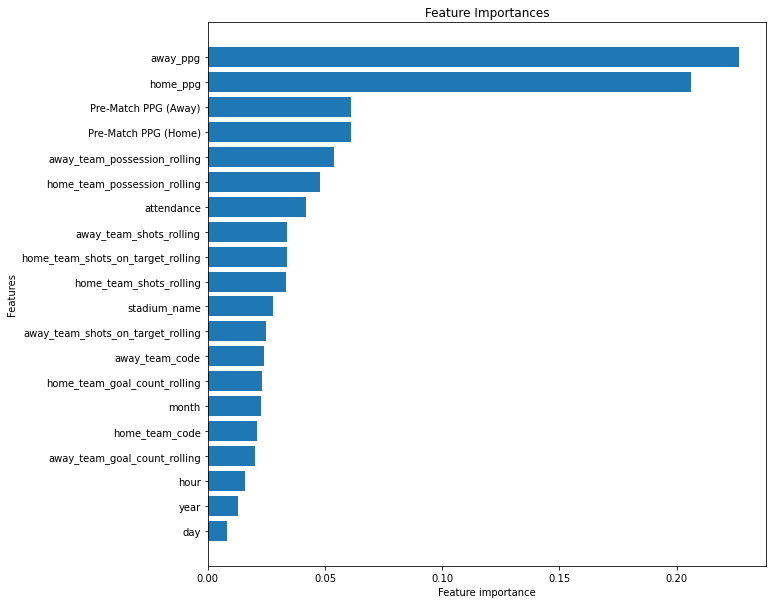

In [320]:
plot_features(predictors+new_cols_home+new_cols_away, feature_importances)

**Conclusion:**
The best estimator is RandomForestClassifier(max_depth=10, max_features=0.5, min_samples_leaf=10,
                       min_samples_split=20, n_estimators=200, random_state=1)

  - The most important features are away_ppg (away team point per game) and home_ppg (home team point per game), which reflects the strength of the away team and the home team. Generally, the home teams have advantage playing in the home court, and stronger away teams are more likely to overcome that disadvantage.feature_importances

  - The model is better when predicting matches in the nearer future. When we use 1 season of data as test data, the model accuracy reaches 67.22%. When we use more than 2 season of data as test data, model accuracy drops below 60%

Something to keep in mind: the test dataset only consists of 180 matches, which is roughly half the matches played in a season (380 matches per season). We used previous games to calculate the rolling averages of 5 home games and 5 away games each team played. We should be able to get more test data by adding some of the previous matches.